In [1]:
install.packages("psych") ## Download and install psych for graphs
library(psych) ## Load psych into this current instance of R but its slowing it down 

df <- read.csv("trials.csv")
 #Add a new column named "BMI" 
df$BMI <- df$Weight / (df$Height^2 / 10000)
 
#Print the modified data frame


also installing the dependencies ‘mnormt’, ‘GPArotation’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



<b>Part One</b>
First, lets produce a summary table of baseline patient characteristics for
each treatment arm separately (i.e. in separate columns).Then, summarise Age, Sex, BMI, Diabetic status, SBP and DBP at the start of the study using
appropriate summary statistics for each variable. 
Indicate in the table which statistics you use for each variable to show whether patients allocated into two arms are comparable.

In [2]:
names(df)#shows the different columns of the table

[1] "Patid"  "Age"    "Sex"    "Trt"    "SBP1"   "DBP1"   "SBP2"   "DBP2"  
 [9] "Diab"   "Weight" "Height" "BMI"

Statistics used for each variable:
<ul>
    <li>Age: mean, range</li>
    <li>Sex: percentage ratio</li>
    <li>BMI: mean, standard deviation</li>
    <li>Diabetic status: ratio(positive and in percentage)</li>
    <li>SBP: mean, standard deviation</li>
    <li>DBP: mean, standard deviaton</li>
  </ul>

In [3]:
table(df$Diab)


  0   1 
191 109 

In [4]:
table(df$Sex)


  0   1 
153 147 

In [5]:

meanAge <-(mean(df$Age))
min_age <- min(df$Age)
max_age <- max(df$Age)
sdAge <- sd(df$Age)
ageRange<- max_age - min_age

meanSBP <- (mean(df$SBP1))
sdSBP <- (sd(df$SBP1))
min_SBP <- min(df$SBP1)
max_SBP <- max(df$SBP1)
SBPrange<- max_SBP - min_SBP 

meanDBP <- (mean(df$DBP1))
sdDBP<-(sd(df$DBP1))
min_DBP <- min(df$DBP1)
max_DBP <- max(df$DBP1)
DBPrange<- max_DBP - min_DBP 

meanBMI<-(mean(df$BMI))
sdBMI <-(sd(df$BMI))
min_BMI <- min(df$BMI)
max_BMI <- max(df$BMI)
BMI_range<-max_BMI - min_BMI 

femalePercentage <- (147/300)*100
malePercentage <- (153/300)*100

maleDiab <- (malePercentage/191)*100 #showing the % value of males positive with diabetes
femaleDiab <- (femalePercentage/109)*100 #showing the % value of females positive with diabetes

maleDiab <- round(maleDiab,2) #showing the % value of males positive with diabetes
femaleDiab <- round(femaleDiab,2) #showing the % value of females positive with diabetes

Creating a chracterstics table for the partcipants

In [6]:
Characteristics <- c("Age", "Sex","BMI","Diabetic Status(postive %)","Systolic Blood Pressure before(mmHg)","Diastolic Blood Pressure before(mmHg)")
mean <- c(meanAge,"na",meanBMI,"na",meanSBP,meanDBP)
sd <- c(sdAge,"na",sdBMI,"na",sdSBP,sdDBP)
range<- c(ageRange,"na",BMI_range,"na",SBPrange,DBPrange)
Males<-c("na",153,"na",maleDiab,"na","na")
Females<-c("na",147,"na",femaleDiab,"na","na")


summaryTable <- data.frame(Characteristics, mean, sd,range,Males,Females)
summaryTable 

Characteristics,mean,sd,range,Males,Females
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Age,59.6266666666667,12.6382901063235,72,na,na
Sex,na,na,na,153,147
BMI,28.3101664401655,7.89670613075354,45.6108418207328,na,na
Diabetic Status(postive %),na,na,na,26.7,44.95
Systolic Blood Pressure before(mmHg),130.713333333333,15.3068226057261,103,na,na
Diastolic Blood Pressure before(mmHg),86.03,16.1536031993197,109,na,na


Now we will produce a scatterplot to visually explore whether there is an association between DBP before and after treatment. 
<br></br>
The data is mostly clustered in one area, there isn’t a very clear relationship between the DBP before and after the trial, but it’s not curve shaped so its linear. The ab line is also slightly increased over the course of the data which further supports a linear relationship. 

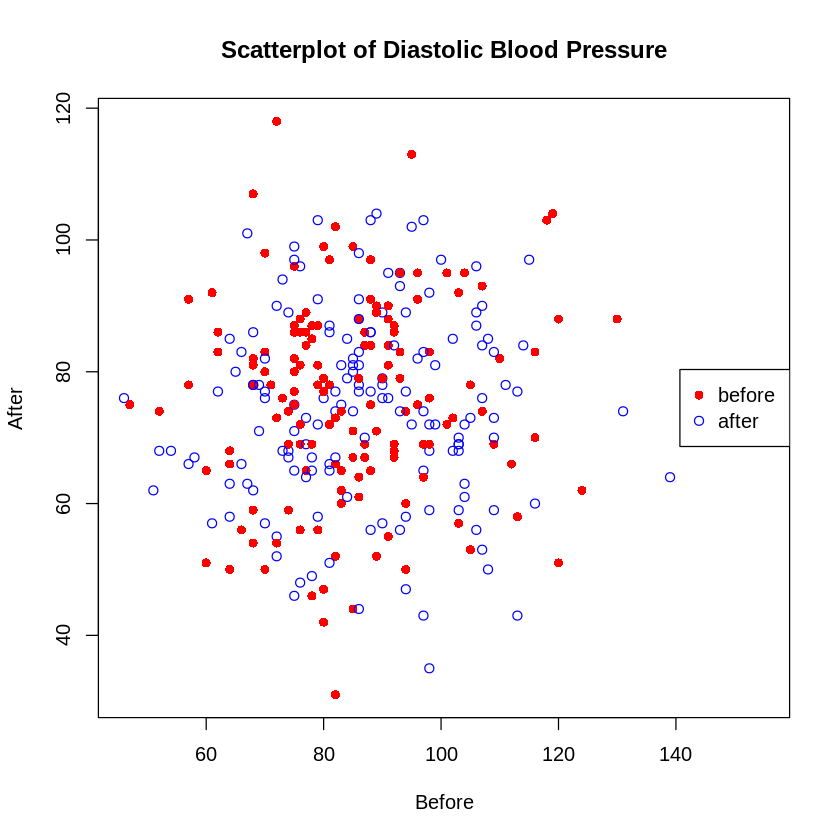

In [7]:
plot(df$DBP1, df$DBP2, 
  pch = c(16, 1), # Different point characters
  col = c("red", "blue"), # Colors for each point set
  xlab = "Before", 
  ylab = "After",
  main = "Scatterplot of Diastolic Blood Pressure"  
)
#displaying the labels for the graph
legend(x="right", legend = c("before","after"),col = c("red", "blue"), pch = c(16, 1)) 

Lets calculate a suitable statistic to explore whether there is a linear association between DBP
before and after treatment. Is the statistics providing you good evidence to apply linear
regression to above mentioned association? Lets see...
<br></br>
The coefficient calculated is 0.034 meaning the direction of the correlation is positive, but a weak positive correlation. However, when calculating the t statistic to get the p-value(0.54), it was larger than p<0.05, proving no significant or concrete association between DBP before the trial and DBP after the trial.

In [8]:
DBP_summaryTable <- data.frame(
    Treatment = df$Trt,
    Diastolic_before = df$DBP1,
    Diastolic_after = df$DBP2)
print(DBP_summaryTable)

    Treatment Diastolic_before Diastolic_after
1           1               83              65
2           1               90              79
3           1              119             104
4           1              103              59
5           0               72             118
6           0               79             103
7           1               68              81
8           1              113              43
9           0               62              86
10          0               86              91
11          0               60              51
12          0              104              61
13          1               91              81
14          0               93              95
15          0               92              87
16          0               84              79
17          1               88              84
18          1               69              71
19          0               87              69
20          1               97             103
21          0

In [9]:
summary(DBP_summaryTable)

   Treatment      Diastolic_before Diastolic_after 
 Min.   :0.0000   Min.   : 46.00   Min.   : 31.00  
 1st Qu.:0.0000   1st Qu.: 75.00   1st Qu.: 66.00  
 Median :1.0000   Median : 85.00   Median : 76.00  
 Mean   :0.5067   Mean   : 86.03   Mean   : 75.11  
 3rd Qu.:1.0000   3rd Qu.: 96.00   3rd Qu.: 85.25  
 Max.   :1.0000   Max.   :155.00   Max.   :118.00  

In [10]:
# Generating Sample Data
set.seed(123) # Ensure reproducibility. The same "seed" will give the same output every time
beforeGroup <- rnorm(300, mean = 86, sd = 16) # Control group
afterGroup <- rnorm(300, mean = 75, sd = 15) # Treatment group

# Viewing a summary of the data
summary(beforeGroup)
summary(afterGroup)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  49.05   76.79   85.30   86.55   96.12  137.86 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.85   65.95   75.68   75.14   85.33  113.57 

<img src = "PRequation.png">

In [11]:
# Define the data
DBP_before <- DBP_summaryTable$Diastolic_before
DBP_after <- DBP_summaryTable$Diastolic_after

# Calculations
sum_x <- sum(DBP_before)
sum_y <- sum(DBP_after)
sum_xy <- sum(DBP_before * DBP_after)
sum_x_squared <- sum(DBP_before^2)
sum_y_squared <- sum(DBP_after^2)
n <- length(DBP_before) # Number of participants (observations)

# Apply the Pearson correlation coefficient formula
numerator <- n * sum_xy - sum_x * sum_y
denominator <- sqrt((n * sum_x_squared - sum_x^2) * (n * sum_y_squared - sum_y^2))

r <- numerator / denominator

# Print the calculated correlation coefficient
print(r)
if (r < 0){
    print("direction of correlation is negative")
}else if (r==0){
    print("no correlation")
}else{
    print("direction of correlation is positive")
}
#correlation is weak positive 

[1] 0.03494596
[1] "direction of correlation is positive"


<img src = "tStat.PNG">

In [12]:
#calculating t statistic of correlation coefficient to test significance 
#variables 
r<- 0.03494596
n<- length(DBP_before)
t<- (r* sqrt(n-2))/sqrt(1-(r^2))
print(t)

[1] 0.6036295


In [13]:

#looking for a difference so its a two-tailed p-value, subtract the cumulative probability from 1 and multiply by 2
dof= n - 2
p_value <- 2 * (1 - pt(abs(t), dof))
p_value

if (p_value < 0.05) {
  print("there is an evident association between DBP before and after treatment")
}else{
    print("there's no concrete association between DBP before and after")
}


[1] 0.5465492

[1] "there's no concrete association between DBP before and after"


In [14]:
#for extra detail
cor.test(DBP_before, DBP_after)


	Pearson's product-moment correlation

data:  DBP_before and DBP_after
t = 0.60363, df = 298, p-value = 0.5465
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07860595  0.14760269
sample estimates:
       cor 
0.03494596 


Now lets write down the model equation for the simple linear regression with DBP at the start of the study as the only covariate. 
yi= a + Bx + ei where:
   •y is the DBP after trial 
   •a is the intercept 
   •Bx is the slope of DBP before trial
   •e is the standard error


In [15]:
#calculating beta_0 the interpect an beta_1 the slope 

# Calculate the necessary components
mean_x <- mean(DBP_before)
mean_y <- mean(DBP_after)

# Calculate the slope (beta_1)
beta_1 <- (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x^2)

# Calculate the intercept (beta_0)
beta_0 <- mean_y - beta_1 * mean_x

# Print the coefficients
print(paste("Slope: ", round(beta_1, 2)))
print(paste("Intercept: ", round(beta_0, 2)))

[1] "Slope:  0.03"
[1] "Intercept:  72.37"


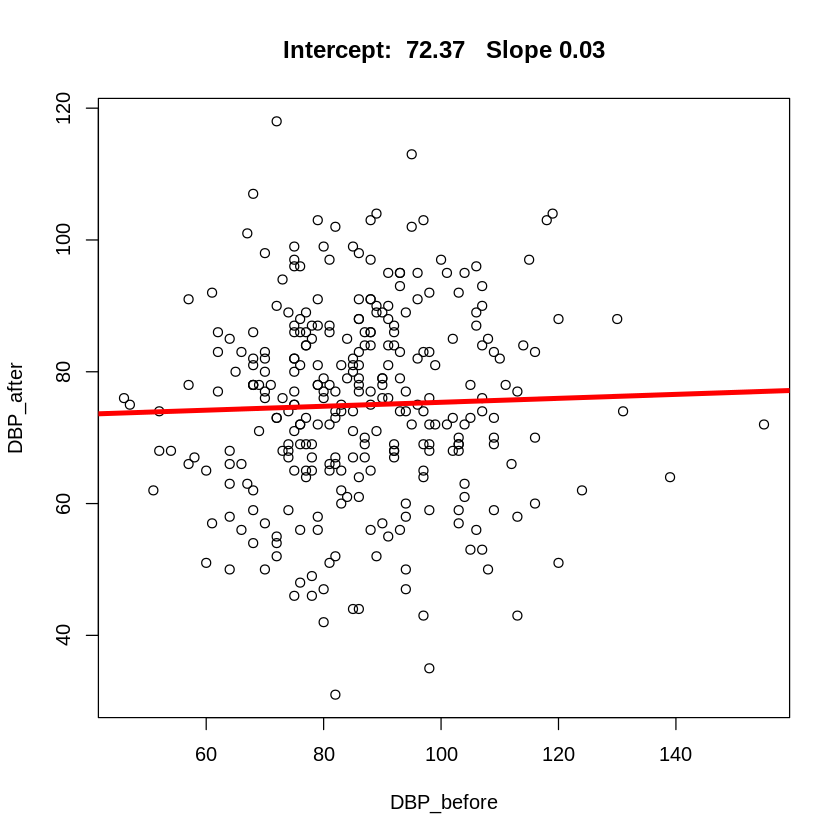

In [16]:
plot(DBP_before, DBP_after, main = paste("Intercept: ", round(beta_0, 2), "  Slope", round(beta_1, 2)))
abline(a = 72.37, b = 0.03, col = "red", lwd = 4) # Here, a=Intercept, b=Slope.


In [17]:
x <- DBP_before
y <-DBP_after

# Fit the model
model <- lm(y ~ x)


In [18]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.985  -8.961   0.744  10.616  43.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 72.37215    4.62026  15.664   <2e-16 ***
x            0.03186    0.05279   0.604    0.547    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.74 on 298 degrees of freedom
Multiple R-squared:  0.001221,	Adjusted R-squared:  -0.00213 
F-statistic: 0.3644 on 1 and 298 DF,  p-value: 0.5465


In [19]:
Coefficients <- c("Intercept", "slope(DBP slope before treatment)")
Estimates <- c(beta_0, beta_1)
StandardError <- c(4.62026 , 0.05279)
Cl<- c(-0.07860595,0.14760269)
p_value<-c("2e-16",0.547)
Estimates<-round(Estimates,3)
StandardError<-round(StandardError,3)
Cl<- round(Cl,3)
modelTable <- data.frame(Coefficients, Estimates, StandardError,Cl,p_value)
modelTable 

Coefficients,Estimates,StandardError,Cl,p_value
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Intercept,72.372,4.620,-0.079,2e-16
slope(DBP slope before treatment),0.032,0.053,0.148,0.547


<h1>So what have we noticed?</h1>

<ul>
<li>When DBP before the trial is 0, the base DBP level after the trial is 72.372mmHg.</li>
<br>
<li>The slope coefficient is a magnitude 0.032, being the average change in the DBP after the trial.</li>
<br>
<li>There is no statistical significance, because the value calculated was bigger than p<0.05, so there is more than a 5% chance of the observed association occurring by chance, making the results insignificant.</li>
</ul>

<b>What assumptions does our model make and how can we further investigate them?</b>
Time to produce an appropriate residual plots and interpret;)
Results?
<br>
There is a linear relationship shown between DBP before and after the trial, and evident from the random cluster that each observed parameter is independent. This satisfies the assumption of linearity and independence from the model. But, the consistency varies due to the amount of outliers, so the assumption that the scattering is consistent is unsatisfactory.

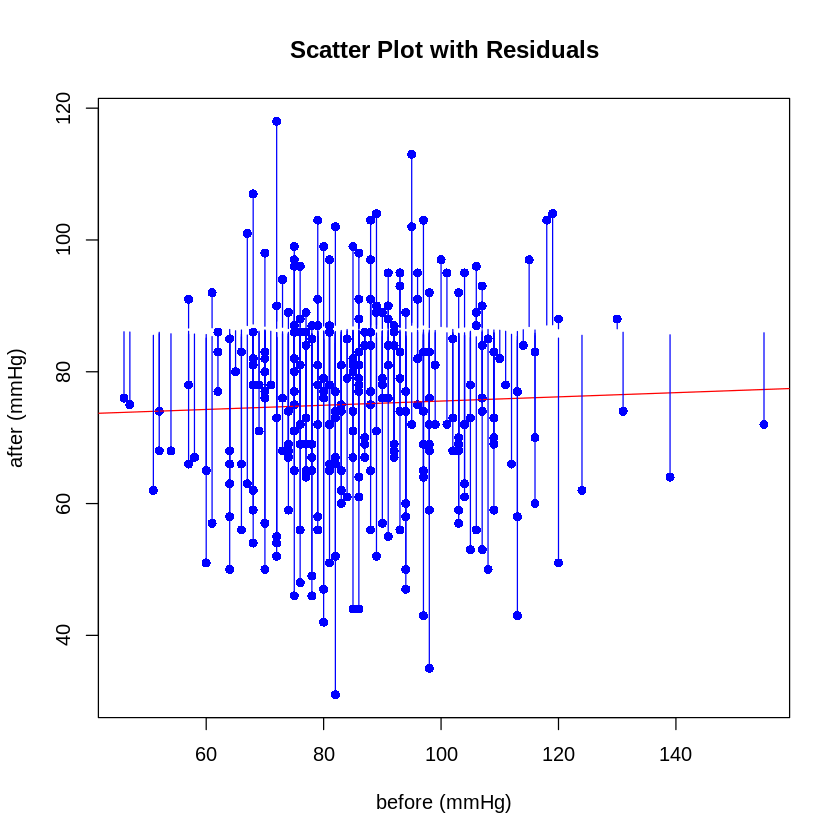

In [20]:
# Fit the linear model for hp ~ mpg in mtcars dataset
residual_model <- lm(DBP_before ~ DBP_after, data = DBP_summaryTable)

# Create a new dataframe that includes the original data, the fitted values, and the residuals
DBP_summaryTable$model_fitted <- fitted(residual_model)
 DBP_summaryTable$model_residuals <- residuals(residual_model)

# Open a new graphics window

# Plot 1: Scatter plot with all residuals
plot( DBP_summaryTable$Diastolic_before,  DBP_summaryTable$Diastolic_after, xlab = "before (mmHg)", ylab = "after (mmHg)", 
     main = "Scatter Plot with Residuals", pch = 16, col = "blue")
abline(model, col = "red") # Add the regression line
segments( DBP_summaryTable$Diastolic_before,  DBP_summaryTable$Diastolic_after,  DBP_summaryTable$Diastolic_before,  DBP_summaryTable$model_fitted, col = "blue") # Draw residuals

Tp make things more interesting, lets imagine the clinical team want to investigate the relationship between categorical DBP (defined
as 0 = “DBP2 < 90”, 1 = “DBP2 ≥ 90”) at the end of the study (DBP2) with treatment (Trt).


Lets generate a categorical DBP variable at the end of study where 0 = “DBP2 < 90” signifies DBP2
values less than 90 mmHg and 1 = “DBP2 ≥ 90” signifies DBP values greater than or equal to
90 mmHg.

In [21]:
DBP_summaryTable$DBP2_category <- ifelse(DBP_summaryTable$Diastolic_after < 90,0,1)# create a variable that uses an if loop assess every observation in the dataset

Now we can produce a 2 x 2 table to summarise treatment and categorical DBP variables. We will perform a statistical test <i>(Chi squared test)</i> to evaluate the hypothesis that there is no association between treatment groups and DBP2 categories.  
Results?
Since the p-values are less than 0.05(95% CI), we can reject the null hypothesis of no association between treated participants and high DBP. The chi squared value isn’t 0, so that suggests there’s a statistically significant association.

In [22]:
#create table
Treatment<- DBP_summaryTable$Treatment#where 0 = placebo and 1= medication 
DBP2 <- DBP_summaryTable$DBP2_category#where 0 = low and 1 = high 
contingency_table <- table(Treatment,DBP2)
print(contingency_table)

         DBP2
Treatment   0   1
        0 118  30
        1 135  17


<img src = "chisquare.PNG">

In [23]:
#chi squared manual way 
# Manually calculate row totals and column totals
row_totals <- c(sum(contingency_table[1,]), sum(contingency_table[2,]))
col_totals <- c(sum(contingency_table[,1]), sum(contingency_table[,2]))

# Calculate grand total
grand_total <- sum(contingency_table)

# Manually compute expected frequencies for each cell
expected_11 <- (row_totals[1] * col_totals[1]) / grand_total
expected_12 <- (row_totals[1] * col_totals[2]) / grand_total
expected_21 <- (row_totals[2] * col_totals[1]) / grand_total
expected_22 <- (row_totals[2] * col_totals[2]) / grand_total

expected <- matrix(c(expected_11, expected_21, expected_12, expected_22), nrow = 2)



In [24]:
chi_statistic <- ((contingency_table - expected_11)^2 / expected_11)+((contingency_table[1,2]-expected_12)^2 /expected_12)+
                ((contingency_table[2,1]-expected_21)^2 /expected_21)+((contingency_table[2,2]-expected_22)^2 / expected_22)

df <- (nrow(contingency_table)-1)*(ncol(contingency_table)-1)
#p value 
pVal<- pchisq(chi_statistic,df,lower.tail = FALSE)

In [25]:
cat("Chi-squared statistic:", chi_statistic, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", pVal, "\n")


Chi-squared statistic: 4.685537 5.144996 76.33771 97.4424 
Degrees of freedom: 1 
P-value: 0.03041756 0.02331346 2.390746e-18 5.544593e-23 


In [26]:
#simplified
chisq.test(contingency_table, correct = FALSE)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 4.6855, df = 1, p-value = 0.03042


Let's Calculate the odds ratio of high DBP2 (categorical DBP value equals to 1) in the active
treatment group compared to placebo with 95% CI and interpret the results.<a href="https://www.youtube.com/watch?v=tzeX01kFs1U&t=538s"> What is Odds Ratio?</a>
<br>
Results?
The odds ratio(0.495), is smaller than 1, indicating the odds are low of a high DBP after treatment. In other words, patients who received the treatment, are 0.495 times more likely to have a higher DBP afterwards than those who received the placebo(the control group) which is very low. 

In [27]:
contingency_table

         DBP2
Treatment   0   1
        0 118  30
        1 135  17

In [28]:
#based on the OR formula in class 
#treatment group odds for high DBP2
trt_p <- 17/152
trt_1p <- 1 - trt_p
trtOdds<- trt_p/trt_1p
#control(placebo) group odds for high DBP2
control_p <- 30/148
control_1p <- 1 - control_p
controlOdds <- control_p/control_1p
#odds ratio 
oddsRatio <- trtOdds/controlOdds
oddsRatio<- round(oddsRatio,3)

In [29]:
if (oddsRatio > 1){
    print("higher odds of a high DBP after trial")
}else if (oddsRatio < 1){
    print("lower odds of a high DBP after trial")
}else{
    print("exposure doesn't affect odds of having high Diastolic Blood Pressure at the end of the trial")
}


[1] "lower odds of a high DBP after trial"


In [30]:
#logit(y)= a + Bx
# Logistic Regression Model
DBP2_model <- glm(DBP2_category ~ Treatment, family = binomial, data = DBP_summaryTable)


# Display the summary of the logistic regression model
summary(DBP2_model)



Call:
glm(formula = DBP2_category ~ Treatment, family = binomial, data = DBP_summaryTable)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6731  -0.6731  -0.4870  -0.4870   2.0932  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.3695     0.2045  -6.698 2.12e-11 ***
Treatment    -0.7026     0.3287  -2.138   0.0326 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 260.46  on 299  degrees of freedom
Residual deviance: 255.73  on 298  degrees of freedom
AIC: 259.73

Number of Fisher Scoring iterations: 4


In [31]:

# Extracting coefficients and their standard errors
coefs <- coef(summary(DBP2_model))
estimates <- coefs[, "Estimate"]
stdE <- coefs[, "Std. Error"]

# Calculate 95% Confidence Intervals
ci_lower <- estimates - 1.96 * stdE
ci_upper <- estimates + 1.96 * stdE

# Cl table    
confidence_intervals <- data.frame(
  Estimate = estimates,
  Lower_95_CI = ci_lower,
  Upper_95_CI = ci_upper
)

# Print the results
print(confidence_intervals)


              Estimate Lower_95_CI Upper_95_CI
(Intercept) -1.3694872   -1.770248 -0.96872650
Treatment   -0.7025742   -1.346803 -0.05834544


Lets write down the model equation for the logistic regression using treatment (Trt) to predict the binary DBP2 level.  
<br>
logit(y) = a + Bx 

Lets attempt to fit it a logistic regression for our model defined previously.

In [32]:
#logit(y)= a + Bx
# Logistic Regression Model
DBP2_model <- glm(DBP2_category ~ Treatment, family = binomial, data = DBP_summaryTable)


<b>Things we've noticed </b> 
<ul>
<li>The negative coefficient for the treatment group suggests there’s a negative association between treatment and high DBP. This means, when applying the treatment, there’s a potential decrease in high DBP.</li>
<br>
<li>Both Confidence interval values are less than p<0.05, meaning we can be confident at a 95% level, that these effects are not just by chance, potentially the treatment has a positive impact on hypertension for those with high Diastolic Blood pressure.</li>
</ul>